# Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

X = np.array([1,3,5,7,9,11,13,15])
y = X+2
X,y

(array([ 1,  3,  5,  7,  9, 11, 13, 15]),
 array([ 3,  5,  7,  9, 11, 13, 15, 17]))

In [7]:
X.shape, y.shape

((8,), (8,))

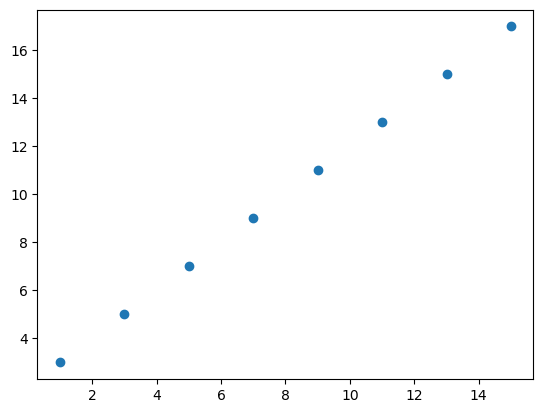

In [8]:
plt.scatter(a,b)

## Introduction to Tensorflow

Reconstituim modelul echivalent cu y = w*x + b

Loss: Minimiza MAE pentru a face predictiile mai apropiate de valorile reale
Optimizer: Algoritm de optimizare care actualizeaza greutatile modelului 
Metrics: Masoara performanta in timpul antrenamentului

tf.keras.layers.Dense(1) reprezinta stratul de output. De asemenea este un exemplu de <b>Offline Learning</b>


In [10]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5


2024-11-28 16:34:41.065949: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 123ms/step - loss: 1.5935 - mae: 1.5935
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 0.9435 - mae: 0.9435
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.8639 - mae: 0.8639
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.8327 - mae: 0.8327
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.8117 - mae: 0.8117


In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[20.188839]], dtype=float32)

## Create test and train data + evaluation

In [13]:
X = np.arange(-100,100,4)
y = X+10
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [14]:
#Split data
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train) == len(y_train), len(X_test) == len(y_test)

(True, True)

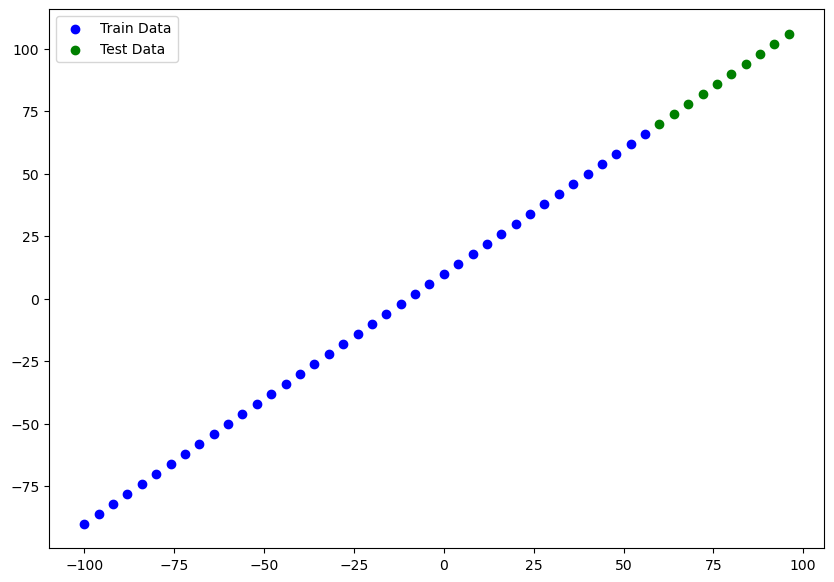

In [18]:
#plot the data
plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c="blue",label="Train Data")
plt.scatter(X_test,y_test,c="green",label="Test Data")
plt.legend()

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 2ms/step - loss: 9.8490 - mae: 9.8490
Epoch 2/200
2/2 [==============================] - 0s 1ms/step - loss: 13.2367 - mae: 13.2367
Epoch 3/200
2/2 [==============================] - 0s 1ms/step - loss: 19.4002 - mae: 19.4002
Epoch 4/200
2/2 [==============================] - 0s 1ms/step - loss: 10.1926 - mae: 10.1926
Epoch 5/200
2/2 [==============================] - 0s 1ms/step - loss: 12.3182 - mae: 12.3182
Epoch 6/200
2/2 [==============================] - 0s 1ms/step - loss: 12.9645 - mae: 12.9645
Epoch 7/200
2/2 [==============================] - 0s 1ms/step - loss: 10.0048 - mae: 10.0048
Epoch 8/200
2/2 [==============================] - 0s 1ms/step - loss: 11.9292 - mae: 11.9292
Epoch 9/200
2/2 [==============================] - 0s 1ms/step - loss: 12.6749 - mae: 12.6749
Epoch 10/200
2/2 [==============================] - 0s 2ms/step - loss: 9.9842 - mae: 9.9842
Epoch 11/200
2/2 [==============================] - 0s 1ms/step

In [26]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 11ms/step


array([[ 77.82663 ],
       [ 82.83805 ],
       [ 87.84947 ],
       [ 92.86089 ],
       [ 97.87231 ],
       [102.88373 ],
       [107.89515 ],
       [112.90656 ],
       [117.917984],
       [122.929405]], dtype=float32)

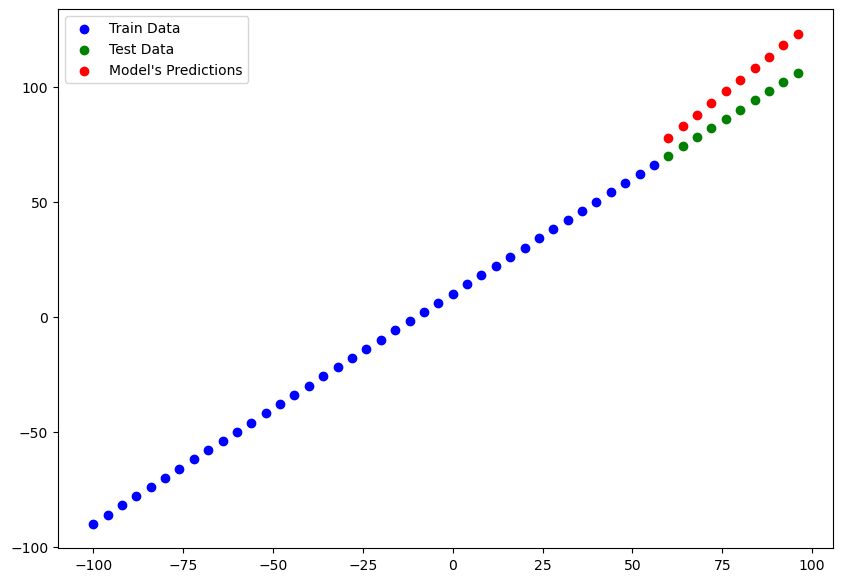

In [27]:
#plot the data
plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c="blue",label="Train Data")
plt.scatter(X_test,y_test,c="green",label="Test Data")
plt.scatter(X_test,y_preds,c="red",label="Model's Predictions")
plt.legend()

# Influența adăugării de neuroni și straturi într-o rețea neuronală

Adăugarea mai multor neuroni într-un strat și adăugarea mai multor straturi într-o rețea neuronală influențează modelul în moduri diferite, afectând capacitatea acestuia de a învăța și de a generaliza din date.

## 1. Adăugarea mai multor neuroni într-un strat (Creșterea lățimii)
- **Capacitate de reprezentare crescută la nivelul respectiv:**  
  Prin mărirea numărului de neuroni într-un strat, modelul poate captura mai multe caracteristici sau pattern-uri la acel nivel de abstractizare.
- **Complexitate computațională mai mare:**  
  Mai mulți neuroni înseamnă mai mulți parametri de antrenat, ceea ce poate crește timpul de antrenare și necesarul de resurse computaționale.
- **Risc de supraînvățare (overfitting):**  
  Un strat prea larg poate duce la modelarea zgomotului din datele de antrenament, afectând capacitatea de generalizare pe date noi.

## 2. Adăugarea mai multor straturi (Creșterea adâncimii)
- **Abilitatea de a învăța caracteristici mai complexe:**  
  Straturile suplimentare permit rețelei să construiască reprezentări mai abstracte și să învețe ierarhii de caracteristici.
- **Putere de expresie crescută:**  
  Rețelele mai adânci pot aproxima funcții mai complexe și pot captura relații non-liniare mai avansate.
- **Provocări în antrenare:**  
  Rețelele foarte adânci pot suferi de probleme precum gradientul care dispare sau explodează, ceea ce poate îngreuna antrenarea. Tehnici precum normalizarea lotului (*batch normalization*) și funcțiile de activare adecvate (de exemplu, ReLU) pot atenua aceste probleme.
- **Performanță potențial îmbunătățită:**  
  În multe cazuri, creșterea adâncimii duce la îmbunătățiri semnificative ale performanței, mai ales în domenii precum procesarea imaginii și recunoașterea vorbirii.

## 3. Efectul poziției straturilor în rețea (aproape de input vs. output)
- **Straturi apropiate de input:**
  - **Capturarea caracteristicilor de nivel scăzut:**  
    Aceste straturi sunt responsabile pentru detectarea caracteristicilor simple, cum ar fi margini sau texturi în imagini.
  - **Adăugarea de neuroni aici:**  
    Poate îmbunătăți capacitatea rețelei de a captura detalii fine și de a reprezenta mai bine variațiile din datele de intrare.
- **Straturi apropiate de output:**
  - **Capturarea caracteristicilor de nivel înalt:**  
    Aceste straturi combină caracteristicile de nivel scăzut pentru a forma reprezentări abstracte relevante pentru sarcina specifică (de exemplu, clasificarea obiectelor).
  - **Adăugarea de neuroni aici:**  
    Poate îmbunătăți abilitatea modelului de a diferenția între clase similare și de a captura relații complexe între caracteristici.

## Concluzie
- **Echilibrul între lățime și adâncime:**  
  Alegerea între a adăuga neuroni sau straturi depinde de natura problemei și de datele disponibile. Uneori, o rețea mai largă este suficientă, în timp ce alteori este necesară o adâncime suplimentară pentru a captura complexitatea datelor.
- **Impactul poziției în rețea:**  
  Adăugarea de neuroni în straturi specifice poate fi folosită pentru a îmbunătăți capturarea caracteristicilor la diferite niveluri de abstractizare, influențând modul în care modelul procesează informația.
- **Experimentare și validare:**  
  Este important să experimentezi cu diferite arhitecturi și să utilizezi seturi de validare pentru a determina configurarea optimă pentru problema ta.

Prin înțelegerea acestor aspecte, poți ajusta arhitectura rețelei neuronale pentru a obține performanțe mai bune și pentru a te asigura că modelul generalizează bine pe date noi.

# A larger example

In [29]:
import pandas as pd

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")\

In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encode using one hot encoding

In [36]:
# encode
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head() 

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [38]:
X = insurance_one_hot.drop(["charges"], axis=1)
y = insurance_one_hot["charges"]
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [41]:
X_train.shape

(1070, 11)

In [76]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

history = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 414us/step - loss: 8776.2490 - mae: 8776.2490
Epoch 2/200
34/34 [==============================] - 0s 386us/step - loss: 7872.8853 - mae: 7872.8853
Epoch 3/200
34/34 [==============================] - 0s 848us/step - loss: 7571.7129 - mae: 7571.7129
Epoch 4/200
34/34 [==============================] - 0s 314us/step - loss: 7670.0562 - mae: 7670.0562
Epoch 5/200
34/34 [==============================] - 0s 289us/step - loss: 7672.9297 - mae: 7672.9297
Epoch 6/200
34/34 [==============================] - 0s 368us/step - loss: 7646.7212 - mae: 7646.7212
Epoch 7/200
34/34 [==============================] - 0s 340us/step - loss: 7528.2236 - mae: 7528.2236
Epoch 8/200
34/34 [==============================] - 0s 335us/step - loss: 7736.2852 - mae: 7736.2852
Epoch 9/200
34/34 [==============================] - 0s 332us/step - loss: 7593.6621 - mae: 7593.6621
Epoch 10/200
34/34 [==============================] - 0s 293us/step - loss: 7742.7

In [77]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 462us/step - loss: 6025.5693 - mae: 6025.5693


[6025.5693359375, 6025.5693359375]

Text(0.5, 0, 'epochs')

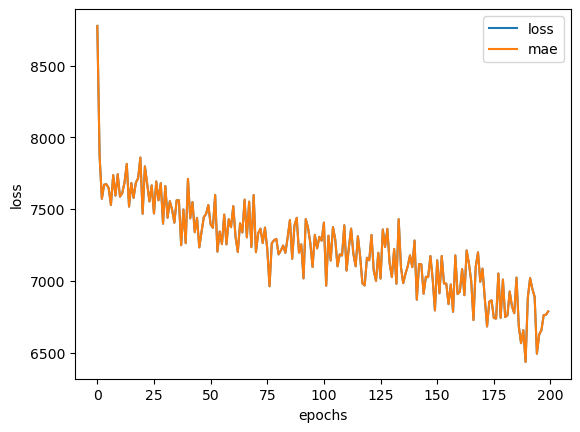

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing Data